# Covid-19 Analysis (Quantitative Modeling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/covid19.csv')
df

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [5]:
df = df.drop(['Sno'],axis=1)
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0
266,21/03/20,Ladakh,13,0,0,0
267,21/03/20,Uttar Pradesh,23,1,9,0
268,21/03/20,Uttarakhand,3,0,0,0


In [6]:
df_sum = df.sum(axis=1)
df['Total Cases'] = df_sum
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0,4
266,21/03/20,Ladakh,13,0,0,0,13
267,21/03/20,Uttar Pradesh,23,1,9,0,33
268,21/03/20,Uttarakhand,3,0,0,0,3


In [7]:
df_new = df.drop(['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'],axis=1)
df_new

,Date,Total Cases
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3
...,...,...
265,21/03/20,4
266,21/03/20,13
267,21/03/20,33
268,21/03/20,3


In [8]:
df_grp = df_new.groupby(['Date'],sort=False)['Total Cases'].sum()
DF = pd.DataFrame(df_grp)
DF['Date'] = DF.index
DF.reset_index(drop=True, inplace=True)
DF

,Total Cases,Date
0,1,30/01/20
1,1,31/01/20
2,2,01/02/20
3,3,02/02/20
4,3,03/02/20
5,3,04/02/20
6,3,05/02/20
7,3,06/02/20
8,3,07/02/20
9,3,08/02/20


In [9]:
x = list(DF['Date'])
y = list(DF['Total Cases'])

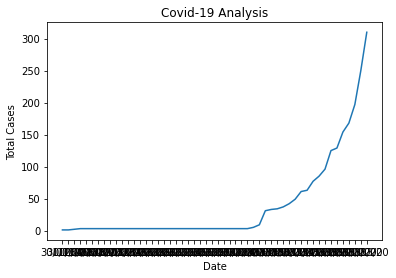

In [10]:
plt.plot(x,y) 
plt.xlabel('Date') 
plt.ylabel('Total Cases') 
plt.title('Covid-19 Analysis')  
plt.show() 

In [16]:
a = DF['Total Cases']
R = []
for i in range(0,len(a)-1):
  r = (a[i+1] - a[i]) / a[i]
  R.append(r)
R = pd.DataFrame(R)
R.rename(columns = {0:'Rate'}, inplace = True) 
R

,Rate
0,0.000000
1,1.000000
2,0.500000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [19]:
R_req = R[34:]
R_req

,Rate
34,0.064516
35,0.030303
36,0.088235
37,0.135135
38,0.166667
39,0.244898
40,0.032787
41,0.222222
42,0.103896
43,0.129412


In [20]:
R_req.mean(axis=0)

Rate    0.148148
dtype: float64